## Import libraries and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# checking the sample of the data
datfra=pd.read_csv('BlackFriday.csv')
datfra.shape
datfra.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# checking if there is any NULL values present in the dataset
datfra.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [4]:
# checking the sample of the data
datfra.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
321722,1001556,P00267542,M,18-25,4,A,3,1,1,16.0,NaN,3945
170941,1002383,P00117842,F,26-35,14,B,3,0,5,13.0,16.0,7098
226451,1004892,P00246742,M,26-35,12,A,1,0,11,15.0,NaN,6034
199586,1000839,P00118742,M,26-35,0,A,2,0,5,11.0,NaN,8607
187353,1004922,P00218942,M,18-25,17,C,1,0,5,NaN,NaN,3446


In [5]:
# decsribing the data

datfra.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
#checking the datasetconsists of null value
datfra.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
# imputing missing values

datfra['Product_Category_2'].fillna(datfra['Product_Category_2'].mean(), inplace = True)
datfra['Product_Category_3'].fillna(datfra['Product_Category_3'].mean(), inplace = True)

datfra.isnull().sum().sum()

0

In [8]:
# finding the maximum purchase in both male and female

datfra.groupby(datfra.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [9]:
# finding the minimum purchase in both male and female

datfra.groupby(datfra.Gender).Purchase.min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [10]:
# checking dependency of gender on purchase

x = datfra[['Gender', 'Purchase']].groupby('Gender').mean()
x = pd.DataFrame(x)
x

,Purchase
Gender,
F,8809.761349
M,9504.771713


In [11]:
# checing the dependency of age attribute with purchasing power

y = datfra[['Age', 'Purchase']].groupby('Age').mean()
y = pd.DataFrame(y)
y

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


In [12]:
# checking the dependency of cities where custoer live with the purchasing power

datfra[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8958.011014
B,9198.657848
C,9844.441855


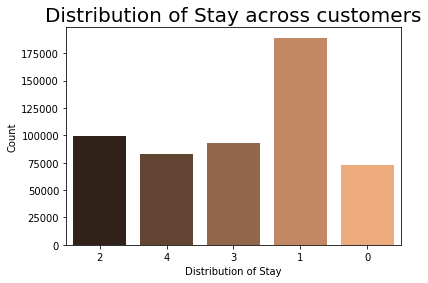

In [13]:
# visualizing the stay in current years

# we need to label the 4+ to 5 to visualize the stay of customers in a city
datfra['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

sns.countplot(datfra['Stay_In_Current_City_Years'], palette = 'copper')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [14]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = datfra['User_ID']
Product_ID = datfra['Product_ID']

data = datfra.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(537577, 10)

In [15]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

datfra['Gender'] = le.fit_transform(datfra['Gender'])
datfra['City_Category'] = le.fit_transform(datfra['City_Category'])
datfra['Age'] = le.fit_transform(datfra['Age'])


In [16]:
# splitting the data into dependent and independents sets

y = datfra['Purchase']

# now removing the purchase column from the dataset
data = datfra.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)


Shape of x:  (537577, 11)
Shape of y:  (537577,)


In [17]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (376303, 11)
Shape of x_test:  (161274, 11)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)


In [18]:
x_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
331784,1003154,P00237842,0,2,4,0,0,0,5,9.842144,12.66984
464940,1005621,P00105042,1,2,7,0,1,0,5,9.000000,12.66984
489857,1003507,P00071442,1,2,0,0,3,0,15,17.000000,12.66984
133792,1002643,P00274442,1,4,17,1,1,1,1,18.000000,12.66984
494846,1004167,P00002942,1,2,20,1,1,0,2,15.000000,12.66984
211386,1002627,P00189542,1,2,1,1,2,1,8,17.000000,12.66984
19083,1003010,P00111042,1,2,12,0,0,0,15,9.842144,12.66984
292713,1003157,P00345042,1,2,12,2,2,0,5,9.842144,12.66984
352559,1000300,P00227742,1,2,7,1,4,1,5,14.000000,12.66984
241757,1001272,P00334242,1,1,20,1,0,0,1,8.000000,12.66984


In [19]:
#Removing unwanted columns

X_train=x_train.drop(['Product_ID'], axis = 1)
X_test=x_test.drop(['Product_ID'], axis = 1)

In [20]:
#Know the values in Data
print(X_train.shape)
print(X_test.shape)

(376303, 10)
(161274, 10)


In [21]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [23]:
print(x_train.shape)
print(x_test.shape)

(376303, 10)
(161274, 10)


# Model Creation and implmentation

In [24]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2930.1773885038515
R2 Score: 0.6541408459989301


In [25]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4695.325707511158
R2 Score: 0.11193879676650542


In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *

model = SGDRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4695.998914642196
R2 Score: 0.11168412135895656


In [29]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4723.64152606142
R2 Score: 0.10119534455835633


In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4695.329243069712
R2 Score: 0.11193745935403976


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3509.018809516016
R2 Score: 0.5039986690806755


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *

model = KNeighborsRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 3765.5618509834435
R2 Score: 0.42882259316671023


In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *

model =MLPRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)



# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

c:\users\shashank rocky\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSE Error: 3953.331197902788
R2 Score: 0.37043895308745833


In [1]:
from rpy2.robjects import pandas2ri

ModuleNotFoundError: No module named 'rpy2'